# AMAZON PRODUCT REVIEW ANALYSIS CAPSTONE PROJECT

# ➤Problem Statement

#### Thomas, a global market analyst, wishes to develop an automated system to analyze and monitor an enormous number of reviews. By monitoring the entire review history of products, he wishes to analyze tone, language, keywords, and trends over time to provide valuable insights that increase the success rate of existing and new products and marketing campaigns.

# Introduction


Everyday we come across various products in our lives, on the digital medium we swipe across hundreds of product choices under one category. It will be tedious for the customer to make selection. Here comes 'reviews' where customers who have already got that product leave a rating after using them and brief their experience by giving reviews. As we know ratings can be easily sorted and judged whether a product is good or bad. But when it comes to sentence reviews we need to read through every line to make sure the review conveys a positive or negative sense. In the era of artificial intelligence, things like that have got easy with the Natural Langauge Processing(NLP) technology.

# IMPORTING LIBRARIES

In [2]:
import json                                        # to work with json file
import pandas as pd                                # to work with dataframes
import numpy as np                                 # to work with numpy arrays
import gzip                                        # to extract work file from zip file
import nltk                                        # working with nlp algorithms
from nltk.sentiment import SentimentIntensityAnalyzer  # To predict the sentiments based on the text
from tqdm.notebook import tqdm                     # library for adding progress bar
import sklearn                                     # to working with machine learning algorithms
from sklearn.linear_model import LogisticRegression  # Classification algorithm
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text to numerical based on tfidf score
from nltk.corpus import stopwords                  # to detect stopwords
import re                                          # To remove the unwanted text
from sklearn.metrics import classification_report  # Classification report
from sklearn.metrics import accuracy_score         # evaluation metric
from sklearn.metrics import f1_score               # evaluation metric
from sklearn.metrics import recall_score           # evaluation metric
from sklearn.metrics import precision_score        # evaluation metric
from sklearn.model_selection import train_test_split # train test split
import time                                        # to check the processing time
from sklearn.preprocessing import LabelEncoder     # To convert categorical to numerical
import warnings
warnings.filterwarnings('ignore')                  # To ignore the warnings
from sklearn.model_selection import StratifiedKFold # Splitting
from sklearn.naive_bayes import MultinomialNB       # Naive bayes algorithm
import matplotlib.pyplot as plt                     # Visualization tool
import seaborn as sns                               # Visualization tool
from statsmodels.tsa.seasonal import seasonal_decompose            # Time series components
from statsmodels.tsa.stattools import adfuller                      # To find the stationarity of the data
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf       # To plot ACF and PACF plots
from statsmodels.tsa.arima.model import ARIMA                       # To build the ARIMA model
from sklearn.metrics import mean_squared_error                      # To check the mean square error                                      
from statsmodels.tsa.statespace.sarimax import SARIMAX              # To build the sarimax model
from sklearn.neighbors import NearestNeighbors                      # KNN algorithm
from sklearn.metrics.pairwise import cosine_similarity              # 
import scipy.sparse
from scipy.sparse import csr_matrix                                 # Correlation Matrix
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler, StandardScaler      # For Scaling the data
from sklearn.cluster import KMeans                                  # For Cluster Formation  
from sklearn.feature_extraction.text import CountVectorizer         # For Vectorisation
from wordcloud import WordCloud, STOPWORDS                          # For Word Cloud
from sklearn import metrics                                         # For Matrics Algorithms
from sklearn.metrics import classification_report                   # For Classification Evaluation Report
from datetime import datetime, timedelta,date
from sklearn.metrics import confusion_matrix                        # It shows the tabel of probability values
from sklearn.metrics import mean_squared_error                      # To check the mean square error 

# CONVERTING THE FILE FROM JSON TO DATAFRAME

In [12]:
#reading the file
df= pd.read_json(r"C:\Users\qwert\Downloads\Digital_Music.json.gz",lines=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"12 22, 2013",A1ZCPG3D3HGRSS,0001388703,{'Format:': ' Audio CD'},mark l. massey,This is a great cd full of worship favorites!!...,Great worship cd,1387670400,NaN,NaN
1,5,True,"09 11, 2013",AC2PL52NKPL29,0001388703,{'Format:': ' Audio CD'},Norma Mushen,"So creative! Love his music - the words, the ...",Gotta listen to this!,1378857600,NaN,NaN
2,5,True,"03 2, 2013",A1SUZXBDZSDQ3A,0001388703,{'Format:': ' Audio CD'},Herbert W. Shurley,"Keith Green, gone far to early in his carreer,...",Great approach still gets the message out,1362182400,NaN,NaN
3,5,True,"12 2, 2012",A3A0W7FZXM0IZW,0001388703,{'Format:': ' Audio CD'},Mary M Raybell,Keith Green had his special comedy style of Ch...,Great A must have,1354406400,NaN,NaN
4,5,False,"01 7, 2012",A12R54MKO17TW0,0001388703,{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,NaN


In [10]:
#reading the json file 
df1= pd.read_json(r"C:\Users\qwert\Downloads\meta_Digital_Music (1).json.gz",lines=True)
df1.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,[],,[],,Master Collection Volume One,"[B000002UEN, B000008LD5, B01J804JKE, 747403435...",,John Michael Talbot,[],"58,291 in CDs & Vinyl (","[B000002UEN, B000008LD5, 7474034352, B000008LD...","<img src=""https://images-na.ssl-images-amazon....",,,$18.99,0001377647,[],[],NaN
1,[],,[],,Hymns Collection: Hymns 1 &amp; 2,"[5558154950, B00014K5V4]",,Second Chapter of Acts,[],"93,164 in CDs & Vinyl (","[B000008KJ3, B000008KJ0, 5558154950, B000UN8KZ...","<img src=""https://images-na.ssl-images-amazon....",,,,0001529145,[],[],NaN
2,[],,[],,Early Works - Don Francisco,"[B00004RC05, B003H8F4NA, B003ZFVHPO, B003JMP1Z...",,Don Francisco,[],"875,825 in CDs & Vinyl (","[B003H8F4NA, B003ZFVHPO, B003JMP1ZK, B00004RC0...","<img src=""https://images-na.ssl-images-amazon....",,,,0001527134,[],[],NaN
3,[],,[],,So You Wanna Go Back to Egypt,"[B0000275QQ, 0001393774, 0001388312, B0016CP2G...",,Keith Green,[],"203,263 in CDs & Vinyl (","[B00000I7JO, B0016CP2GS, 0001393774, B0000275Q...","<img src=""https://images-na.ssl-images-amazon....",,,$13.01,0001388703,[],[],NaN
4,[],,[1. Losing Game 2. I Can't Wait 3. Didn't He S...,,Early Works - Dallas Holm,"[B0002N4JP2, 0760131694, B00002EQ79, B00150K8J...",,Dallas Holm,[],"399,269 in CDs & Vinyl (","[B0002N4JP2, 0760131694, B00150K8JC, B003MTXNV...","<img src=""https://images-na.ssl-images-amazon....",,,,0001526146,[],[],NaN


In [13]:
# Feature Selection for data1
data1 = df[['asin', 'reviewText','reviewerName', 'overall', 'unixReviewTime', 'reviewTime', 'reviewerID']]

In [14]:
# Feature Selection for data2
data2 = df1[['asin', 'title', 'price', 'brand']]

In [15]:
# Merging the data set
M_data = pd.merge(data1, data2, on = 'asin')
M_data.head()

,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand
0,0001388703,This is a great cd full of worship favorites!!...,mark l. massey,5,1387670400,"12 22, 2013",A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,$13.01,Keith Green
1,0001388703,"So creative! Love his music - the words, the ...",Norma Mushen,5,1378857600,"09 11, 2013",AC2PL52NKPL29,So You Wanna Go Back to Egypt,$13.01,Keith Green
2,0001388703,"Keith Green, gone far to early in his carreer,...",Herbert W. Shurley,5,1362182400,"03 2, 2013",A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,$13.01,Keith Green
3,0001388703,Keith Green had his special comedy style of Ch...,Mary M Raybell,5,1354406400,"12 2, 2012",A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,$13.01,Keith Green
4,0001388703,Keith Green / So you wanna go back to Egypt......,J. Bynum,5,1325894400,"01 7, 2012",A12R54MKO17TW0,So You Wanna Go Back to Egypt,$13.01,Keith Green


# DATA EXPLORATION

In [16]:
# Checking Shape of dataset
M_data.shape

(182826, 10)

In [18]:
# Checking Description
M_data.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,182826.0,4.532041e+00,9.898177e-01,1.0,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
unixReviewTime,182826.0,1.367855e+09,1.332979e+08,877305600.0,1.321574e+09,1.410134e+09,1.459620e+09,1.538352e+09


In [21]:
# Checking the Datatypes of the merged data
M_data.dtypes

asin              object
reviewText        object
reviewerName      object
overall            int64
unixReviewTime     int64
reviewTime        object
reviewerID        object
title             object
price             object
brand             object
dtype: object

In [20]:
# Checking information of dataset
M_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182826 entries, 0 to 182825
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   asin            182826 non-null  object
 1   reviewText      182736 non-null  object
 2   reviewerName    182803 non-null  object
 3   overall         182826 non-null  int64 
 4   unixReviewTime  182826 non-null  int64 
 5   reviewTime      182826 non-null  object
 6   reviewerID      182826 non-null  object
 7   title           182826 non-null  object
 8   price           182826 non-null  object
 9   brand           182826 non-null  object
dtypes: int64(2), object(8)
memory usage: 15.3+ MB


# DATA PREPROCESSING

In [22]:
# Removing the duplicates
M_data.drop_duplicates(["reviewText","asin","reviewerName"], keep = "last", inplace = True)

In [23]:
# Checking null values
M_data.isnull().sum()

asin               0
reviewText        85
reviewerName      21
overall            0
unixReviewTime     0
reviewTime         0
reviewerID         0
title              0
price              0
brand              0
dtype: int64

In [25]:
# Dropping the Null Values
M_data.dropna(inplace=True)

In [27]:
# Checking for Null Values after treatment
M_data.isnull().sum()

asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
price             0
brand             0
dtype: int64

# DATA CLEANING

Clean text is human language rearranged into a format that machine models can understand. Text cleaning can be performed using simple Python code that eliminates stopwords, removes unicode words, and simplifies complex words to their root form.

In [28]:
# Creating cleaning function
import re
import string

def cleaning(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [29]:
# Calling the cleaning function for reviewText column
M_data["reviewText"] = M_data["reviewText"].apply(cleaning)

In [30]:
# converting the data type of reviewTime with date type
M_data['reviewTime'] = pd.to_datetime(M_data['reviewTime'])

# SENTIMENT ANALYSIS

# What is sentiment analysis?

- Sentiment analysis is a text analysis method that detects polarity (e.g. a positive or negative opinion) within the text, whether a whole document, paragraph, sentence, or clause.

- Sentiment analysis aims to measure the attitude, sentiments, evaluations, attitudes, and emotions of a speaker/writer based on the computational treatment of subjectivity in a text.

# Creating 'sentiment' column

This is an important preprocessing phase, we are deciding the outcome column (sentiment of review) based on the overall score. If the score is greater than 3, we take that as positive and if the value is less than 3 it is negative If it is equal to 3, we take that as neutral sentiment

In [31]:
# Assigning the Positive Negative and Neutral Sentiment ob the basis of overall column
a=[]
for x in M_data['overall']: 
    if x>3:
        x='Pos'
        a.append(x)
    elif x==3:
        x='Neutral'
        a.append(x)
    else:
        x='Neg'
        a.append(x)

In [32]:
M_data['Sentiment']=a

# VADER

- VADER ( Valence Aware Dictionary for Sentiment Reasoning) is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity (strength) of emotion. It is available in the NLTK package and can be applied directly to unlabeled text data.
- VADER sentimental analysis relies on a dictionary that maps lexical features to emotion intensities known as sentiment scores. The sentiment score of a text can be obtained by summing up the intensity of each word in the text.
- For example- Words like ‘love’, ‘enjoy’, ‘happy’, ‘like’ all convey a positive sentiment. Also VADER is intelligent enough to understand the basic context of these words, such as “did not love” as a negative statement. It also understands the emphasis of capitalization and punctuation, such as “ENJOY”

In [35]:
# Getting the polarity of reviewText 
res2 = {}
t = 0
for i, row in tqdm(M_data.iterrows(), total=len(M_data)):
    text = row['reviewText']
    res2[t] = SentimentIntensityAnalyzer().polarity_scores(text)
    t = t + 1

  0%|          | 0/163043 [00:00<?, ?it/s]

In [36]:
# Transposing the dataframe
j = pd.DataFrame(res2).T
j

,neg,neu,pos,compound
0,0.000,0.446,0.554,0.9545
1,0.000,0.652,0.348,0.8927
2,0.000,0.909,0.091,0.6808
3,0.000,0.664,0.336,0.8442
4,0.030,0.701,0.269,0.8807
...,...,...,...,...
163038,0.000,0.000,1.000,0.5719
163039,0.024,0.740,0.236,0.9628
163040,0.000,0.377,0.623,0.7650
163041,0.000,0.385,0.615,0.4927


In [37]:
# concating the main data and the Polarity Scores
H_data = pd.concat([M_data, j], axis = 1)

In [41]:
# Dropping the null values
H_data.dropna(inplace = True)

In [42]:
# Creating the Class column based on compound column
H_data.insert(0, 'Class', np.nan)
H_data.loc[H_data['compound']>=0.05, 'Class'] = 'pos'
H_data.loc[H_data['compound']<=-0.05, 'Class'] = 'neg'
H_data.loc[((H_data['compound'] > -0.05) & (H_data['compound'] < 0.05)), 'Class'] = 'neutral'

In [43]:
# giving the datetiem index for reviewtime on the basis of year and month
H_data['year'] = pd.DatetimeIndex(H_data['reviewTime']).year
H_data['month'] = pd.DatetimeIndex(H_data['reviewTime']).month
H_data['day']= pd.DatetimeIndex(H_data['reviewTime']).day

# TEXT CLASSIFICATION

Text classification also known as text tagging or text categorization is the process of categorizing text into organized groups. By using Natural Language Processing (NLP), text classifiers can automatically analyze text and then assign a set of pre-defined tags or categories based on its content.

# Remove text-Stop words

Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [44]:
import spacy

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Get the stop words for English
stop_words = nlp.Defaults.stop_words

# Print the stop words
print(stop_words)

{'are', 'seems', 'sometimes', 'anything', 'how', 'go', 'is', 'third', 'through', 'yet', 'enough', 'becoming', 'have', 'anywhere', 'its', 'each', 'all', 'whither', 'whether', '‘d', 'them', 'put', 'empty', 'seemed', 'and', 'anyone', 'so', 'being', 'yourselves', 'much', 'he', 'either', 'become', 'must', 'only', 'used', 'whence', 'many', 'own', 'most', 'thence', 'became', 'be', 'other', 'me', 'here', 'less', 'two', 'why', 'therein', 'can', 'even', 'not', 'anyhow', 'ten', 'eleven', 'n‘t', 'nor', 'whose', 'noone', 'though', 'toward', 'above', 'whereupon', 'about', 'within', "n't", 'hence', 'than', 'myself', 'twenty', 'please', 'without', 'us', 'otherwise', 'whereby', 'around', 'might', 'top', 'whereas', 'always', 'an', 'back', 'wherein', '‘s', 'twelve', 'keep', 'first', 'formerly', 'him', 'they', 'such', 'whom', 'from', 'make', 'a', 'anyway', 'everyone', 'under', 'we', 'various', 'by', 'due', 'very', 'against', 'every', "'ve", 'yours', 'forty', 'do', 'towards', 'but', 'am', 'ourselves', 'bee

In [45]:
# applying stopword function on reviewText
H_data['reviewText'] = H_data['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# TF-IDF (Term Frequency-Inverse Document Frequency)
It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

In [59]:
H_data.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
0,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,2013-12-22,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,$13.01,Keith Green,Pos,0.00,0.446,0.554,0.9545,2013,12,22
1,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,2013-09-11,AC2PL52NKPL29,So You Wanna Go Back to Egypt,$13.01,Keith Green,Pos,0.00,0.652,0.348,0.8927,2013,9,11
2,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,2013-03-02,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,$13.01,Keith Green,Pos,0.00,0.909,0.091,0.6808,2013,3,2
3,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,2012-12-02,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,$13.01,Keith Green,Pos,0.00,0.664,0.336,0.8442,2012,12,2
4,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,2012-01-07,A12R54MKO17TW0,So You Wanna Go Back to Egypt,$13.01,Keith Green,Pos,0.03,0.701,0.269,0.8807,2012,1,7


In [60]:
H_data.shape

(143641, 19)

In [61]:
# checking null values
H_data.isnull().sum()

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
day               0
dtype: int64

In [62]:
H_data.dtypes

Class                     object
asin                      object
reviewText                object
reviewerName              object
overall                  float64
unixReviewTime           float64
reviewTime        datetime64[ns]
reviewerID                object
title                     object
price                     object
brand                     object
Sentiment                 object
neg                      float64
neu                      float64
pos                      float64
compound                 float64
year                       int64
month                      int64
day                        int64
dtype: object

In [63]:
def convert_price(val):
    try:
        return float(val.replace('$', ''))
    except:
        return np.nan

H_data['price'] = H_data['price'].apply(convert_price)

median_price = H_data['price'].median()

H_data['price'] = H_data['price'].fillna(median_price)

In [65]:
# Changing the data into CSV File
H_data.to_csv("Digital_MusicFinal1.csv")

In [349]:
# Importing the data
df= pd.read_csv("Digital_MusicFinal1.csv")
df.head()

,Unnamed: 0,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
0,0,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,2013-12-22,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.446,0.554,0.9545,2013,12,22
1,1,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,2013-09-11,AC2PL52NKPL29,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.652,0.348,0.8927,2013,9,11
2,2,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,2013-03-02,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.909,0.091,0.6808,2013,3,2
3,3,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,2012-12-02,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.664,0.336,0.8442,2012,12,2
4,4,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,2012-01-07,A12R54MKO17TW0,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.03,0.701,0.269,0.8807,2012,1,7


In [350]:
df.isnull().sum()

Unnamed: 0            0
Class                 0
asin                  0
reviewText          315
reviewerName          2
overall               0
unixReviewTime        0
reviewTime            0
reviewerID            0
title               719
price                 0
brand             18726
Sentiment             0
neg                   0
neu                   0
pos                   0
compound              0
year                  0
month                 0
day                   0
dtype: int64

In [351]:
mode = df['reviewText'].mode()[0]
df['reviewText'].fillna(mode, inplace=True)

In [352]:
mode1= df['reviewerName'].mode()[0]
df['reviewerName'].fillna(mode, inplace=True)

In [353]:
mode2 = df['title'].mode()[0]
df['title'].fillna(mode, inplace=True)

In [354]:
mode3 = df['brand'].mode()[0]
df['brand'].fillna(mode, inplace=True)

In [355]:
# dropping the 'Unnamed: 0' column
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [356]:
df.isnull().sum()

Class             0
asin              0
reviewText        0
reviewerName      0
overall           0
unixReviewTime    0
reviewTime        0
reviewerID        0
title             0
price             0
brand             0
Sentiment         0
neg               0
neu               0
pos               0
compound          0
year              0
month             0
day               0
dtype: int64

In [75]:
X = df['reviewText']
Y = df['Sentiment']

In [76]:
Y.value_counts()

Pos        127003
Neg          9016
Neutral      7622
Name: Sentiment, dtype: int64

In [77]:
Y = LabelEncoder().fit_transform(Y)
Y

array([2, 2, 2, ..., 2, 2, 2])

In [78]:
# Getting unique values and converting it into array
unique, counts = np.unique(Y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[     0   9016]
 [     1   7622]
 [     2 127003]]


In [79]:
# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [80]:
# Getting unique values after splitting the data
unique, counts = np.unique(Y_train, return_counts=True)
print(np.asarray((unique, counts)).T)

[[    0  6399]
 [    1  5300]
 [    2 88849]]


In [81]:
#Applying TFIDF Vectorizer
vectorizer = TfidfVectorizer(sublinear_tf = True, max_df = 0.1, min_df = 1,
                             use_idf = True, smooth_idf = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# MODEL SELECTION
Let's consider all the classification algorithm and perform the model selection process

In [82]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [83]:
log_reg = LogisticRegression()
d_tree = DecisionTreeClassifier()
r_forrest = RandomForestClassifier()
naive_bayes = MultinomialNB()


model_map = {0:'Logistic Regression', 1:'Decision Tree', 2:'Random Forrest',3:"Naive Bayes"}
models = [log_reg, d_tree, r_forrest, naive_bayes]

In [84]:
for i,model in enumerate(models):
    
    models[i].fit(X_train, Y_train)
    y_pred = models[i].predict(X_test)
    y_train_pred = models[i].predict(X_train)
    
    print('Report of {}:' .format(model_map[i]))
    print('Train set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(Y_train, y_train_pred)*100))
    print('Test set accuracy of {}: {:.5f} %'.format(model_map[i], accuracy_score(Y_test, y_pred)*100))
    print('\n')
    print(classification_report(Y_test, y_pred))
    print('\n')
    print('\n')

Report of Logistic Regression:
Train set accuracy of Logistic Regression: 91.39118 %
Test set accuracy of Logistic Regression: 90.17010 %


              precision    recall  f1-score   support

           0       0.68      0.36      0.47      2617
           1       0.40      0.07      0.12      2322
           2       0.91      0.99      0.95     38154

    accuracy                           0.90     43093
   macro avg       0.66      0.47      0.51     43093
weighted avg       0.87      0.90      0.88     43093





Report of Decision Tree:
Train set accuracy of Decision Tree: 99.52262 %
Test set accuracy of Decision Tree: 85.57538 %


              precision    recall  f1-score   support

           0       0.36      0.33      0.34      2617
           1       0.17      0.13      0.15      2322
           2       0.92      0.94      0.93     38154

    accuracy                           0.86     43093
   macro avg       0.48      0.47      0.47     43093
weighted avg       0.84    

In [85]:
nb_model=MultinomialNB()
logreg_model=LogisticRegression(max_iter=1000)

stacked_model=StackingClassifier(estimators=[('nb', nb_model), ('logreg', logreg_model)],
    final_estimator=LogisticRegression(max_iter=1000))


In [86]:
stacked_model.fit(X_train,Y_train)

StackingClassifier(estimators=[('nb', MultinomialNB()),
                               ('logreg', LogisticRegression(max_iter=1000))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [87]:
y_pred=stacked_model.predict(X_test)

In [88]:
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred,average='weighted',zero_division=1)
recall = recall_score(Y_test, y_pred,average='weighted')
f1 = f1_score(Y_test, y_pred,average='weighted')


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')

Accuracy: 0.9018634116909939
Precision: 0.8744366515217067
Recall: 0.9018634116909939
F1 score: 0.8819774009774024


# TIME SERIES ANALYSIS
Time series analysis is a technique in statistics that deals with time series data and trend analysis. Time series data follows periodic time intervals that have been measured in regular time intervals or have been collected in particular time intervals.

In [106]:
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller,acf,pacf

In [361]:
df.head()

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
0,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,2013-12-22,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.446,0.554,0.9545,2013,12,22
1,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,2013-09-11,AC2PL52NKPL29,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.652,0.348,0.8927,2013,9,11
2,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,2013-03-02,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.909,0.091,0.6808,2013,3,2
3,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,2012-12-02,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.00,0.664,0.336,0.8442,2012,12,2
4,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,2012-01-07,A12R54MKO17TW0,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.03,0.701,0.269,0.8807,2012,1,7


In [362]:
# Converting Date time
df['reviewTime']= pd.to_datetime(df['reviewTime'])
df= df.set_index('reviewTime')

In [363]:
df

,Class,asin,reviewText,reviewerName,overall,unixReviewTime,reviewerID,title,price,brand,Sentiment,neg,neu,pos,compound,year,month,day
reviewTime,,,,,,,,,,,,,,,,,,
2013-12-22,pos,0001388703,great cd worship favorites time great keith gr...,mark l. massey,5.0,1.387670e+09,A1ZCPG3D3HGRSS,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.000,0.446,0.554,0.9545,2013,12,22
2013-09-11,pos,0001388703,creative love music words message favorite son...,Norma Mushen,5.0,1.378858e+09,AC2PL52NKPL29,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.000,0.652,0.348,0.8927,2013,9,11
2013-03-02,pos,0001388703,keith green gone far early carreer left golden...,Herbert W. Shurley,5.0,1.362182e+09,A1SUZXBDZSDQ3A,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.000,0.909,0.091,0.6808,2013,3,2
2012-12-02,pos,0001388703,keith green special comedy style chirstian mus...,Mary M Raybell,5.0,1.354406e+09,A3A0W7FZXM0IZW,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.000,0.664,0.336,0.8442,2012,12,2
2012-01-07,pos,0001388703,keith green wanna egypt album keith gets messa...,J. Bynum,5.0,1.325894e+09,A12R54MKO17TW0,So You Wanna Go Back to Egypt,13.01,Keith Green,Pos,0.030,0.701,0.269,0.8807,2012,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-03-20,pos,B00IV5EUIE,pleasantly surprised great record love betty y...,Benjamin S Velevitch,5.0,1.521504e+09,A1JF88ZOF3OOT8,Rsd)Heartbreak\7&quot;,79.98,love,Pos,0.000,0.000,1.000,0.5719,2018,3,20
2016-05-28,pos,B00IV5EUIE,betty heart wanted sure owned vinyl copies she...,Alejandra,5.0,1.464394e+09,A10DWTPIRJWXH6,Rsd)Heartbreak\7&quot;,79.98,love,Pos,0.024,0.740,0.236,0.9628,2016,5,28
2014-06-15,pos,B00IV5EUIE,pop star released rare acoustic version hit so...,Steven Belec,5.0,1.402790e+09,A2TSX7TILWKDMO,Rsd)Heartbreak\7&quot;,79.98,love,Pos,0.000,0.377,0.623,0.7650,2014,6,15


In [422]:
df['Class'].value_counts()

pos        124386
neg         10503
neutral      8752
Name: Class, dtype: int64

In [423]:
positive=df[(df['Class'] =='pos')]  # Positive
negative=df[(df['Class'] == 'neg')]  #Negative
neutral=df[(df['Class'] == 'neutral')]    #Neutral

<AxesSubplot:xlabel='reviewTime'>

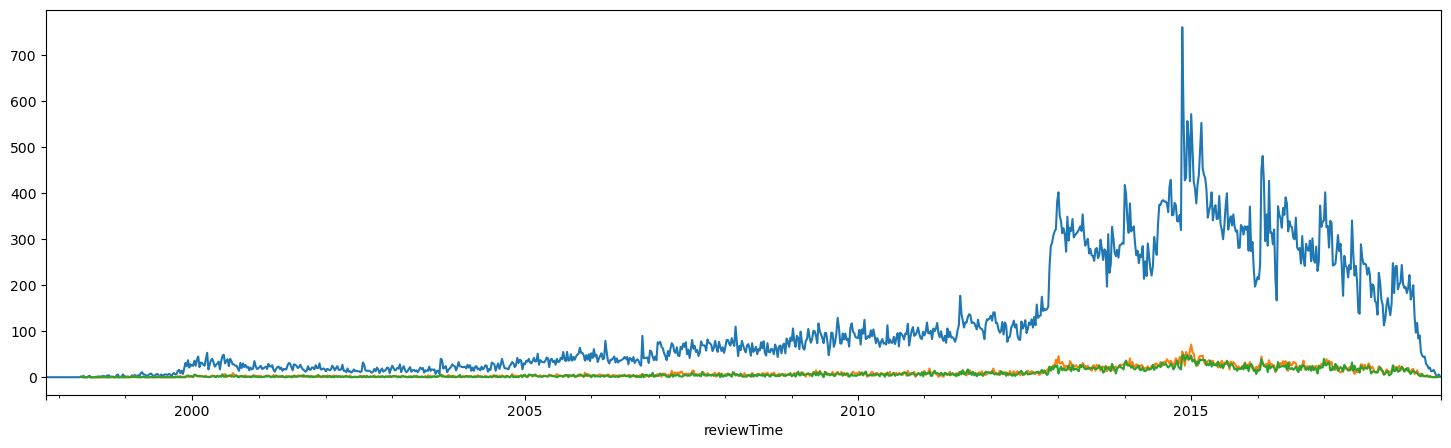

In [461]:
positive['reviewerID'].resample('W').count().plot(figsize=(18,5),label='Positive')
negative['reviewerID'].resample('W').count().plot(figsize=(18,5),label='Negative')
neutral['reviewerID'].resample('W').count().plot(figsize=(18,5),label='Neutral')

In [463]:
decomposition_p=seasonal_decompose(np.asarray(positive['reviewerID'].resample('W').count()), period=12)
d_trend_p=decomposition_p.trend
d_seasonal_p=decomposition_p.seasonal
d_residual_p=decomposition_p.resid

decomposition=seasonal_decompose(np.asarray(neutral['reviewerID'].resample('W').count()), period=12)
d_trend=decomposition.trend
d_seasonal=decomposition.seasonal
d_residual=decomposition.resid

decomposition_n=seasonal_decompose(np.asarray(negative['reviewerID'].resample('W').count()), period=12)
d_trend_n=decomposition_n.trend
d_seasonal_n=decomposition_n.seasonal
d_residual_n=decomposition_n.resid

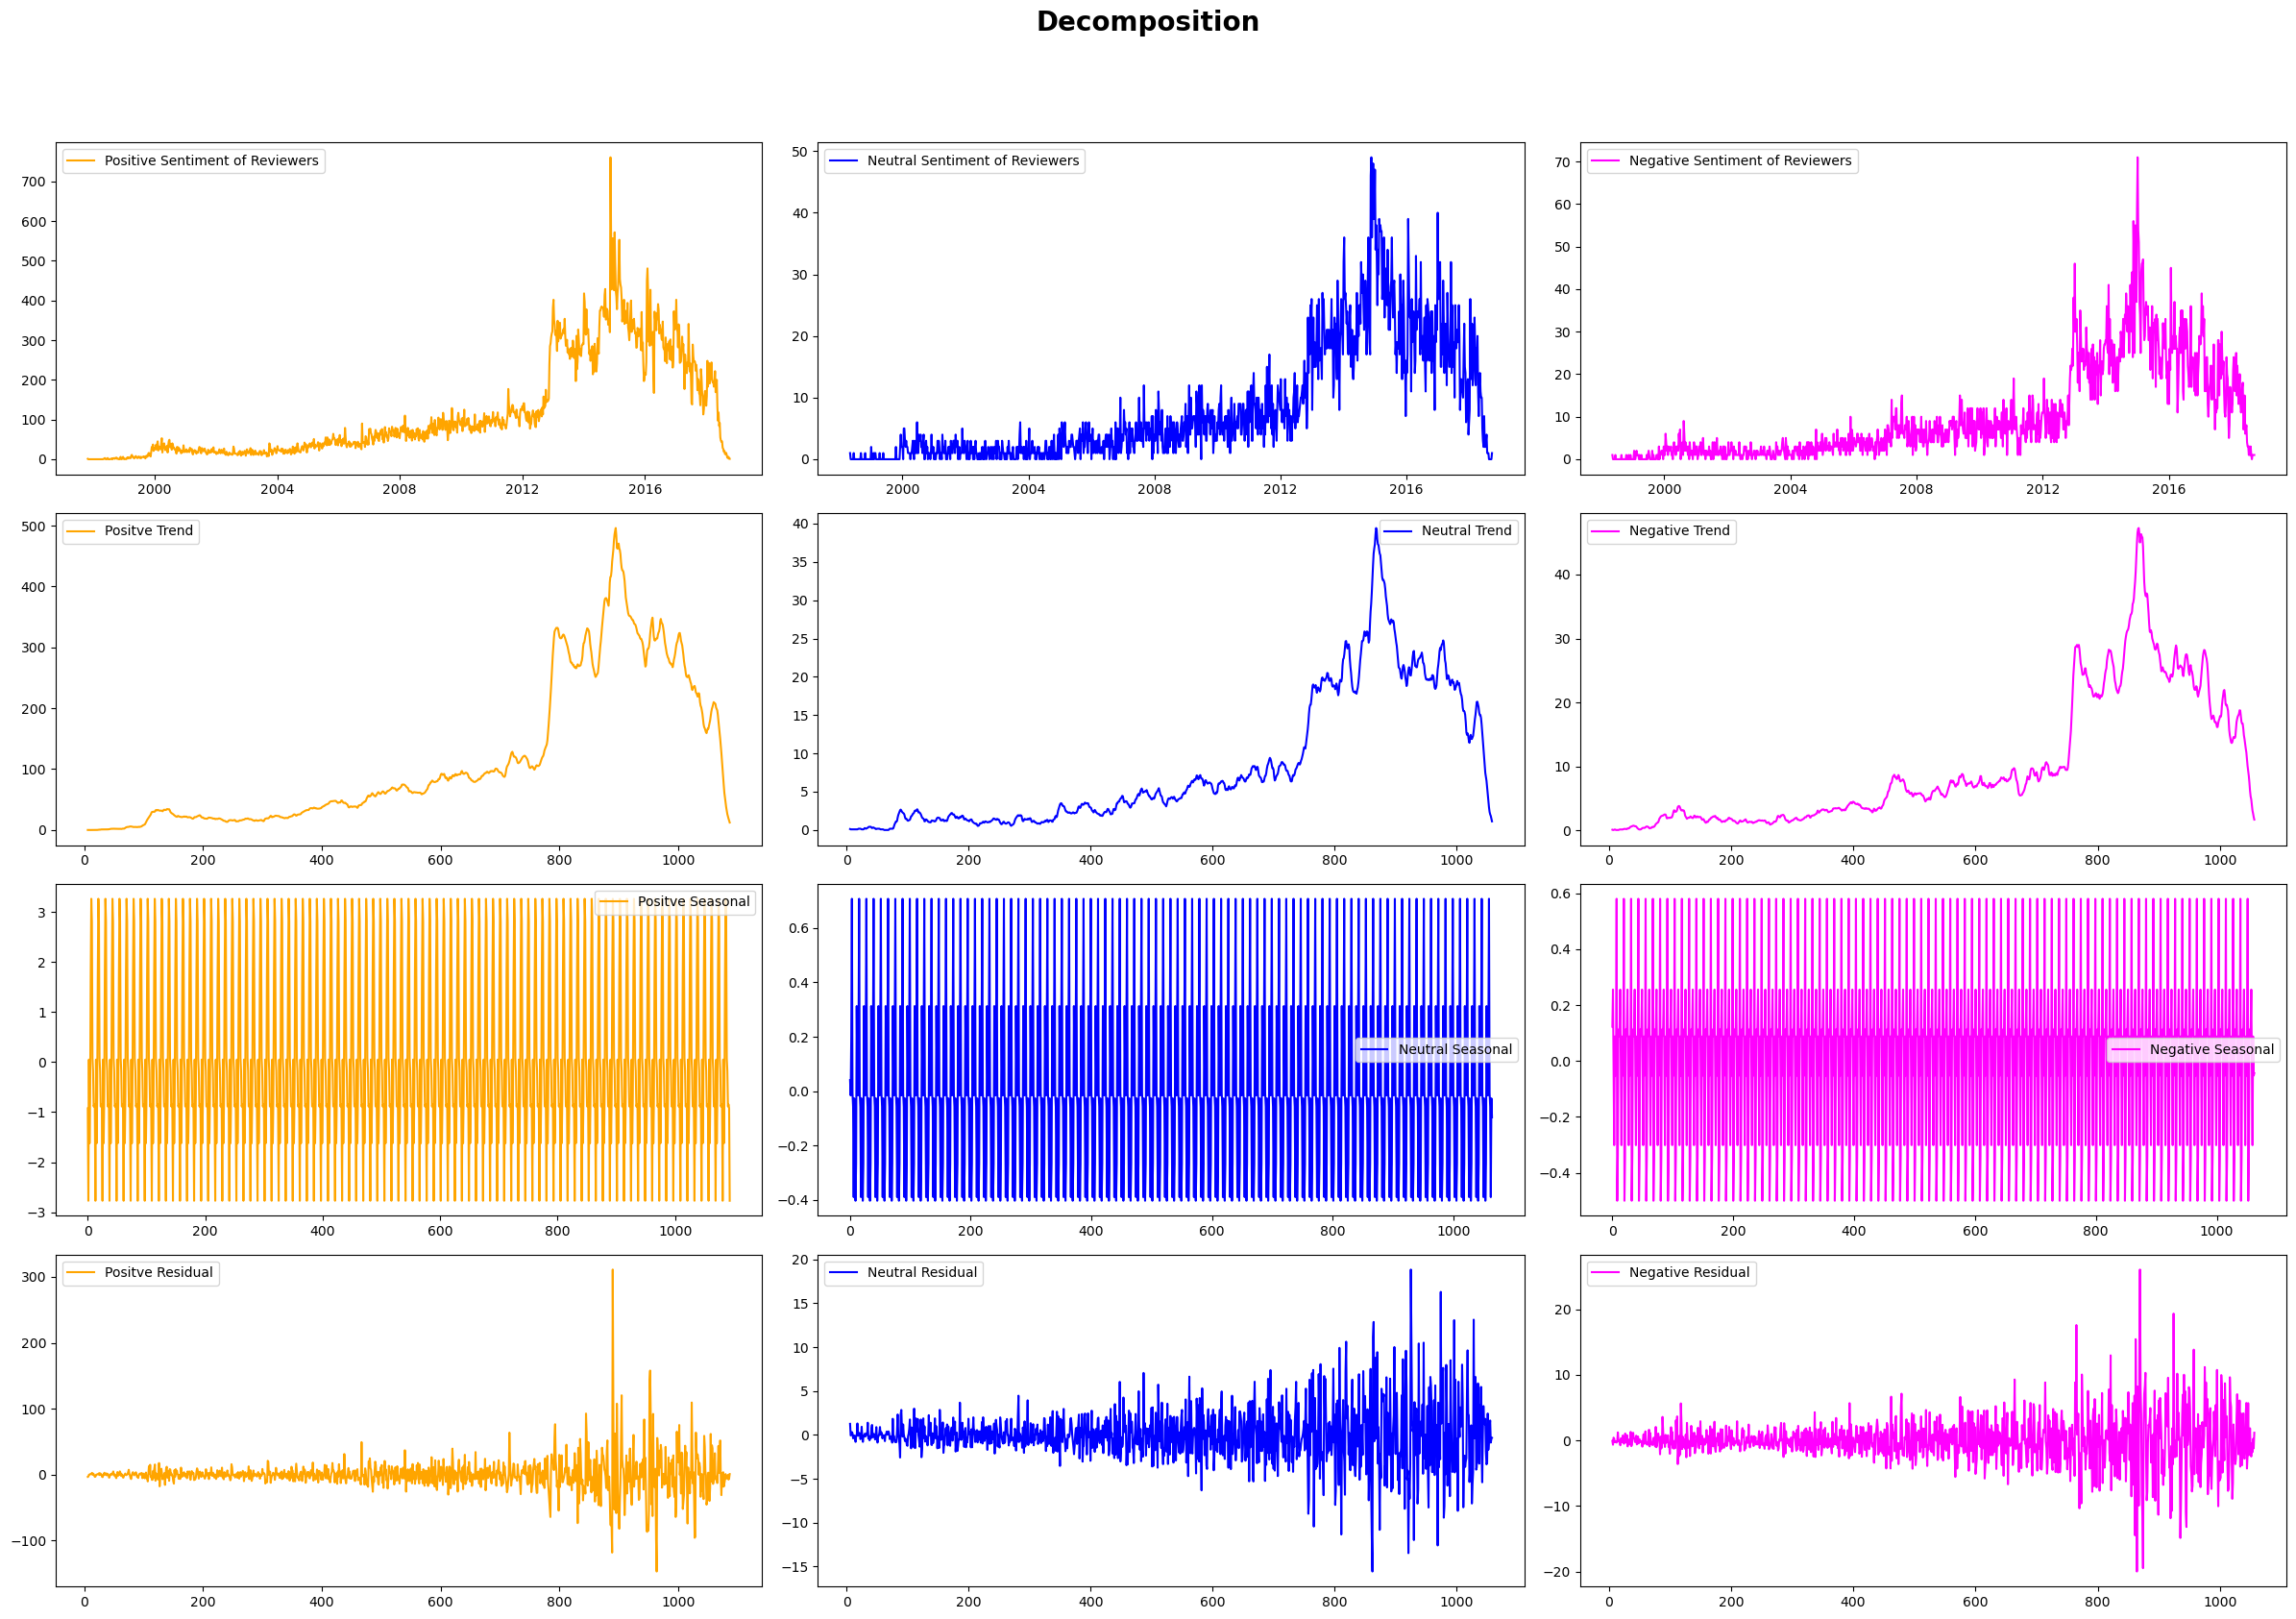

In [464]:
# plotting all the 4 graphs
fig,ax = plt.subplots(4,3,figsize=(24,16))
plt.subplot(4,3,1)
plt.plot(positive['reviewerID'].resample('W').count(),label='Positive Sentiment of Reviewers',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,2)
plt.plot(neutral['reviewerID'].resample('W').count(),label='Neutral Sentiment of Reviewers',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,3)
plt.plot(negative['reviewerID'].resample('W').count(),label='Negative Sentiment of Reviewers',color='magenta')
plt.legend(loc='best')


# Trend
plt.subplot(4,3,4)
plt.plot(d_trend_p,label='Positve Trend',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,5)
plt.plot(d_trend,label='Neutral Trend',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,6)
plt.plot(d_trend_n,label='Negative Trend',color='magenta')
plt.legend(loc='best')


# Seasonality
plt.subplot(4,3,7)
plt.plot(d_seasonal_p,label='Positve Seasonal',color='orange')
plt.legend(loc='best')


plt.subplot(4,3,8)
plt.plot(d_seasonal,label='Neutral Seasonal',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,9)
plt.plot(d_seasonal_n,label='Negative Seasonal',color='magenta')
plt.legend(loc='best')


# Residual
plt.subplot(4,3,10)
plt.plot(d_residual_p,label='Positve Residual',color='orange')
plt.legend(loc='best')

plt.subplot(4,3,11)
plt.plot(d_residual,label='Neutral Residual',color='blue')
plt.legend(loc='best')

plt.subplot(4,3,12)
plt.plot(d_residual_n,label='Negative Residual',color='magenta')
plt.legend(loc='best')

plt.suptitle('Decomposition',x=0.5,y=1.05,fontweight='bold',fontsize=20)
plt.tight_layout()

# Interpretation

- Above plots shows the time series decomposition and we can see the components of time series for positive reviews
- First plot is actual data plot with weekly dispersed data points
- Second one shows the trend in the data where we can see there is negative trend in the dataset
- Third plot shows the seasonality which we can see some repetitions over the period of time
- Last plot shows the irregularity in the the data over a period of time we can see some irregular kind over a period in the plot

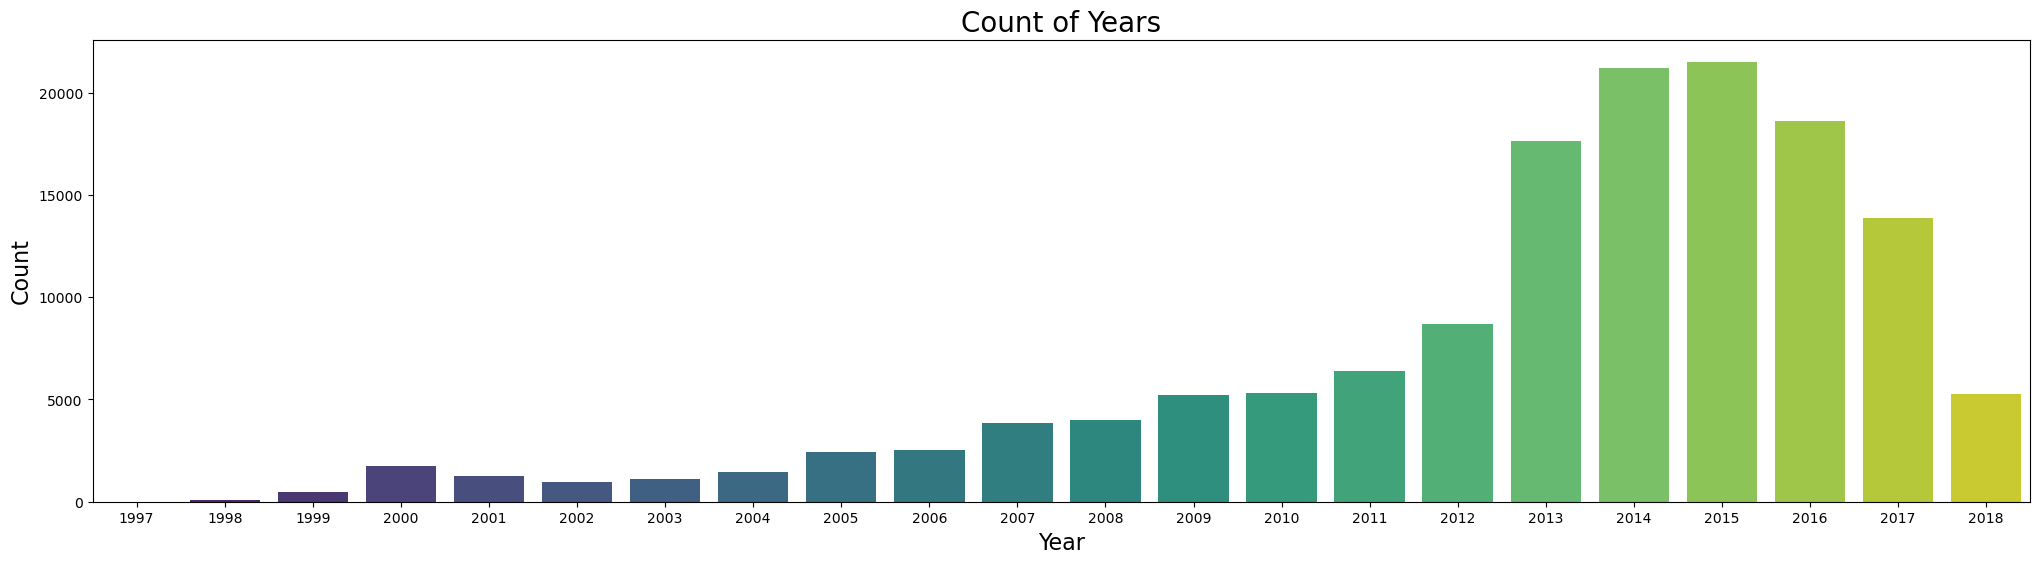

In [465]:
plt.figure(figsize=(25, 6))
sns.countplot(df.year,palette='viridis')
plt.title('Count of Years', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

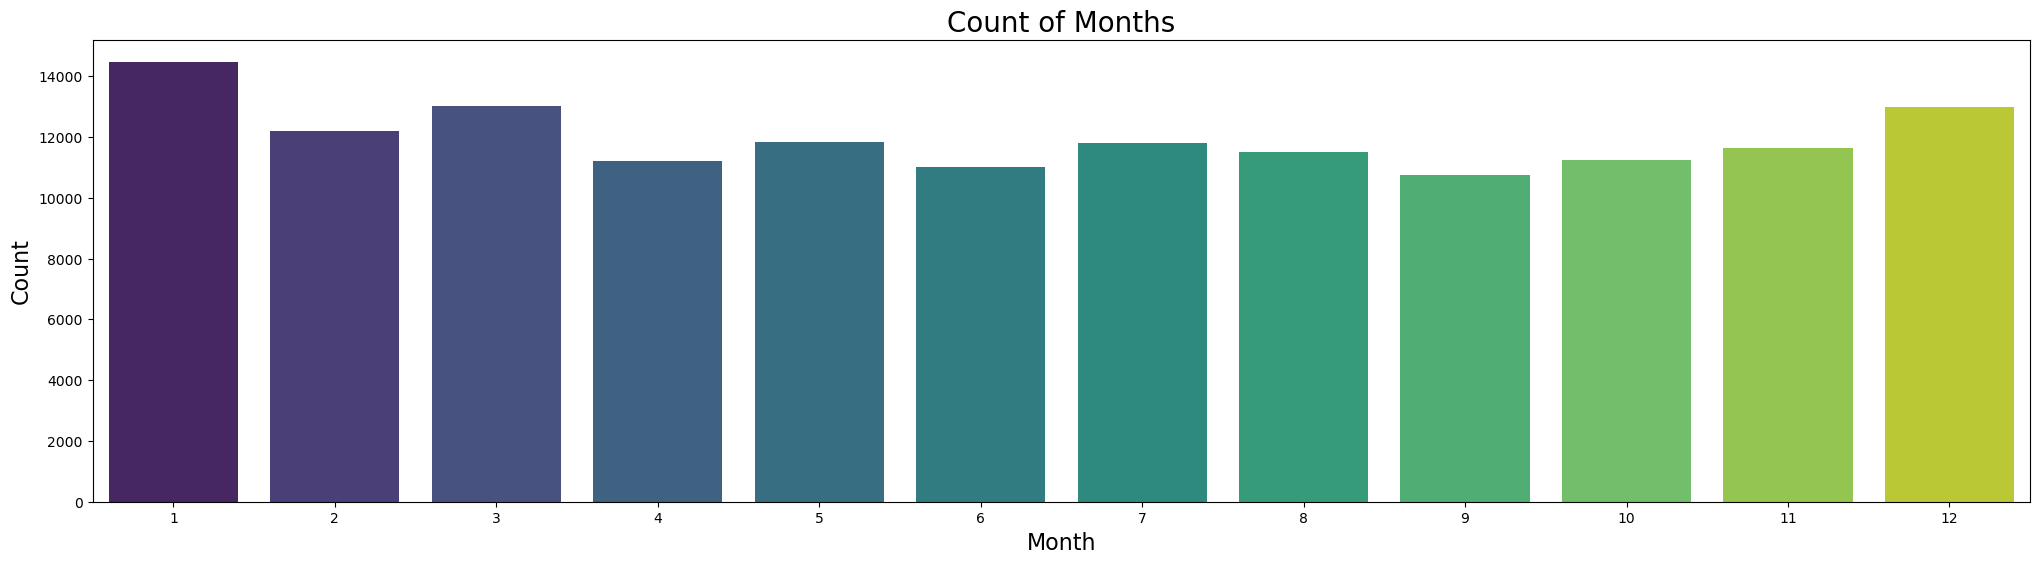

In [466]:
plt.figure(figsize=(25, 6))
sns.countplot(df.month, palette='viridis')
plt.title('Count of Months', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

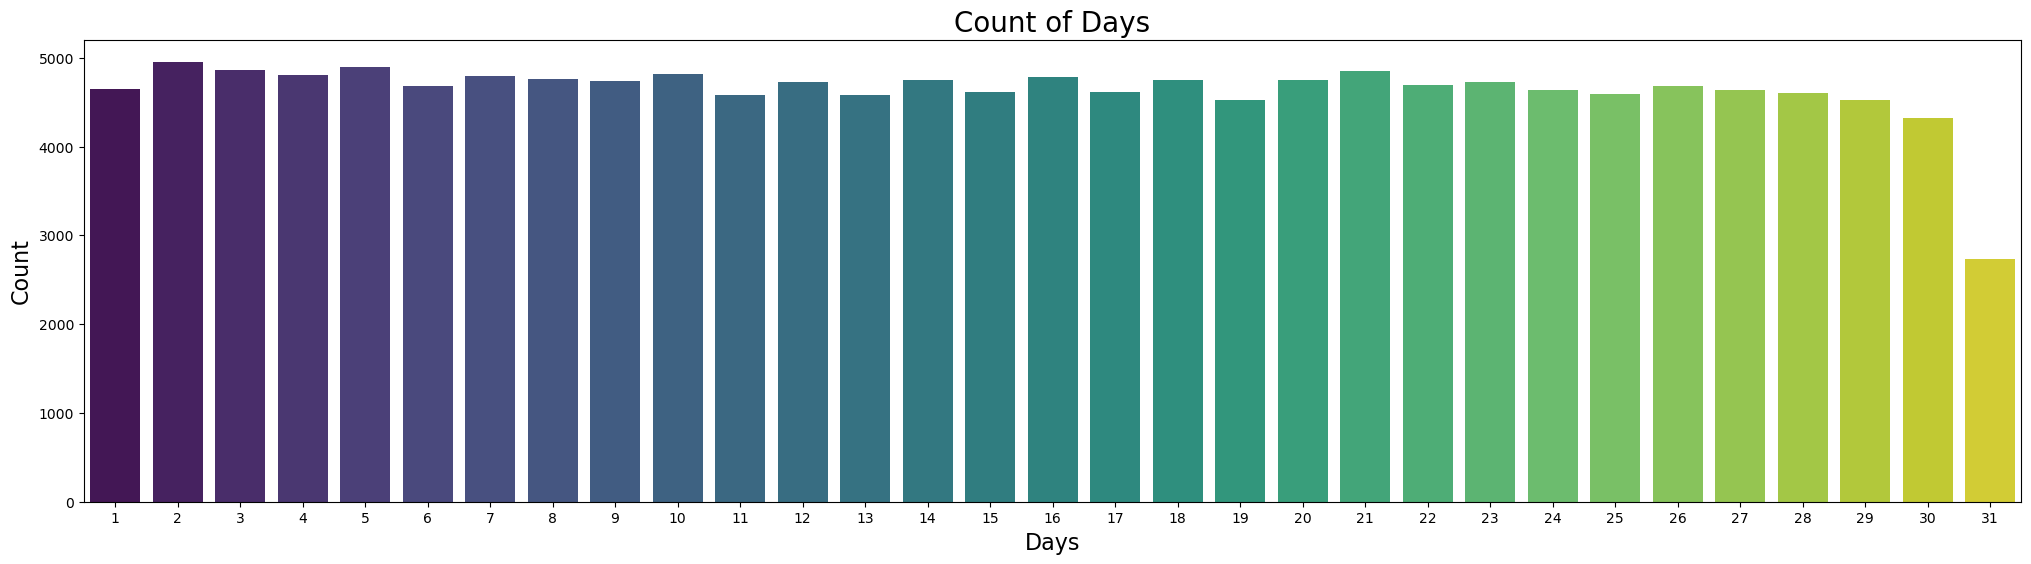

In [467]:
plt.figure(figsize=(25, 6))
sns.countplot(df.day, palette='viridis')
plt.title('Count of Days', fontsize=20)
plt.xlabel('Days', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show()

In [468]:
# Creating function to check stationarity
def checkstationary(df):
    pvalue = adfuller(df)[1]
    if pvalue < 0.05:
        ret = 'Pvalue:{}. Data is stationary, Proceed to model building'.format(pvalue)
    else:
        ret = 'Pvalue:{}.Data is not stationary, make data stationary'.format(pvalue)
    return ret

In [469]:
positive1=positive['reviewerID'].resample('M').count()
negative1=negative['reviewerID'].resample('M').count()
neutral1=neutral['reviewerID'].resample('M').count()

In [470]:
checkstationary(positive1.iloc[round(len(positive1)*0.7):])

'Pvalue:0.7120354940624487.Data is not stationary, make data stationary'

In [471]:
checkstationary(negative1.iloc[round(len(negative1)*0.7):])

'Pvalue:0.42970808472899474.Data is not stationary, make data stationary'

In [472]:
checkstationary(neutral1.iloc[round(len(neutral1)*0.7):])

'Pvalue:0.5722053143952103.Data is not stationary, make data stationary'

In [473]:
diff_pos = positive1- positive1.shift()
diff_neg = negative1- negative1.shift()
diff_neu = neutral1 - neutral1.shift()
diff_pos.dropna(inplace=True)
diff_neg.dropna(inplace=True)
diff_neu.dropna(inplace=True)
diff_pos.head(3),diff_neg.head(3),diff_neu.head(3)

(reviewTime
 1997-11-30   -1.0
 1997-12-31    0.0
 1998-01-31    0.0
 Freq: M, Name: reviewerID, dtype: float64,
 reviewTime
 1998-06-30    0.0
 1998-07-31   -1.0
 1998-08-31    1.0
 Freq: M, Name: reviewerID, dtype: float64,
 reviewTime
 1998-06-30    0.0
 1998-07-31   -1.0
 1998-08-31    0.0
 Freq: M, Name: reviewerID, dtype: float64)

In [474]:
checkstationary(diff_pos.iloc[round(len(diff_pos)*0.7):])

'Pvalue:3.9216593170947964e-17. Data is stationary, Proceed to model building'

In [475]:
checkstationary(diff_neg.iloc[round(len(diff_neg)*0.7):])

'Pvalue:2.616184494718982e-20. Data is stationary, Proceed to model building'

In [476]:
checkstationary(diff_neu.iloc[round(len(diff_neu)*0.7):])

'Pvalue:3.614890113837643e-22. Data is stationary, Proceed to model building'

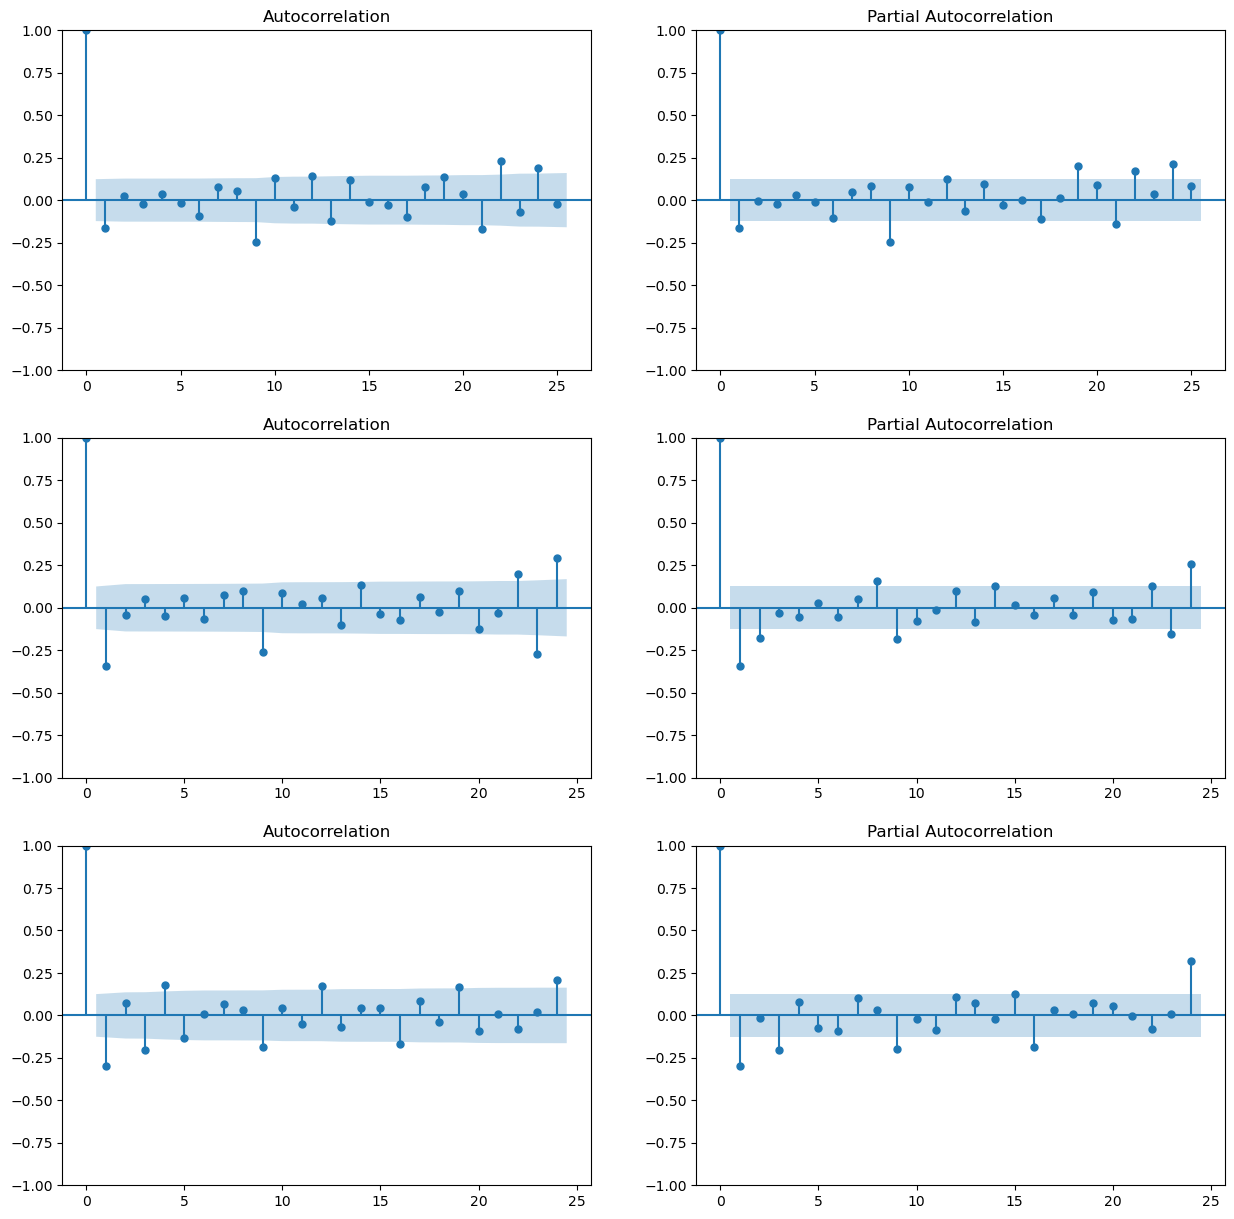

In [477]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
plot_acf(diff_pos,ax=ax[0,0])
plot_pacf(diff_pos,ax=ax[0,1])
plot_acf(diff_neu,ax=ax[1,0])
plot_pacf(diff_neu,ax=ax[1,1])
plot_acf(diff_neg,ax=ax[2,0])
plot_pacf(diff_neg,ax=ax[2,1])
plt.show()

In [440]:
train_pos=positive1[(positive1.index.year >= 2006) & (positive1.index.year <= 2016)]
test_pos=positive1[(positive1.index.year > 2016)]

In [441]:
sarima = SARIMAX(train_pos,order=(1,2,1),seasonal_order=(1,2,1,52)).fit()
sarima_train_pred = sarima.predict(0,(len(train_pos)-1))
sarima_test_pred = sarima.predict(len(train_pos),(len(train_pos)+len(test_pos)-1))
print(sarima.summary())
ljung3 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung3}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  132
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 52)   Log Likelihood                -183.376
Date:                            Mon, 03 Apr 2023   AIC                            376.752
Time:                                    14:32:39   BIC                            383.042
Sample:                                01-31-2006   HQIC                           378.563
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5176      0.663     -0.781      0.435      -1.816       0.781
ma.L1         -1.0000    133.350   

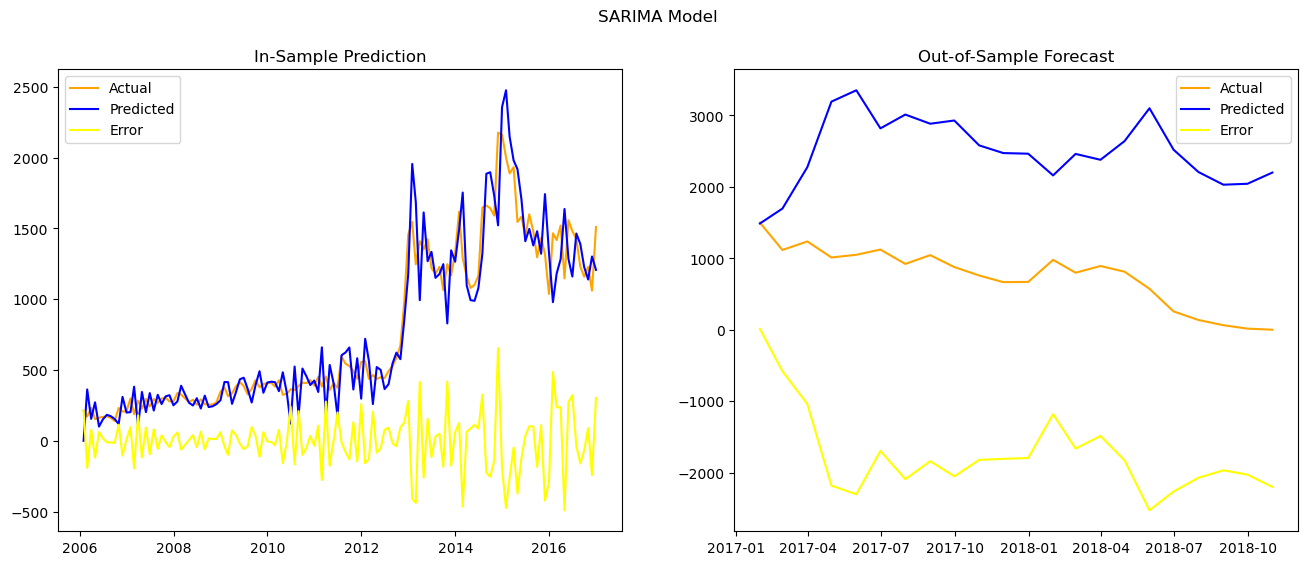

In [442]:
saim_train = pd.DataFrame({'Actual':train_pos,'Predicted':sarima_train_pred})
saim_test = pd.DataFrame({'Actual':test_pos,'Predicted':sarima_test_pred})
saim_train['Error']=saim_train['Actual']-saim_train['Predicted']
saim_test['Error']=saim_test['Actual']-saim_test['Predicted']
plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim_train['Actual'],color='orange',label='Actual')
plt.plot(saim_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim_test['Actual'],color='orange',label='Actual')
plt.plot(saim_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [443]:
np.sqrt(mean_squared_error(saim_test.Actual,saim_test.Predicted))

1839.8232588431804

In [444]:
np.sqrt(mean_squared_error(saim_train.Actual,saim_train.Predicted))

188.38937523672334

In [445]:
fortp=sarima.forecast(len(test_pos)+21)

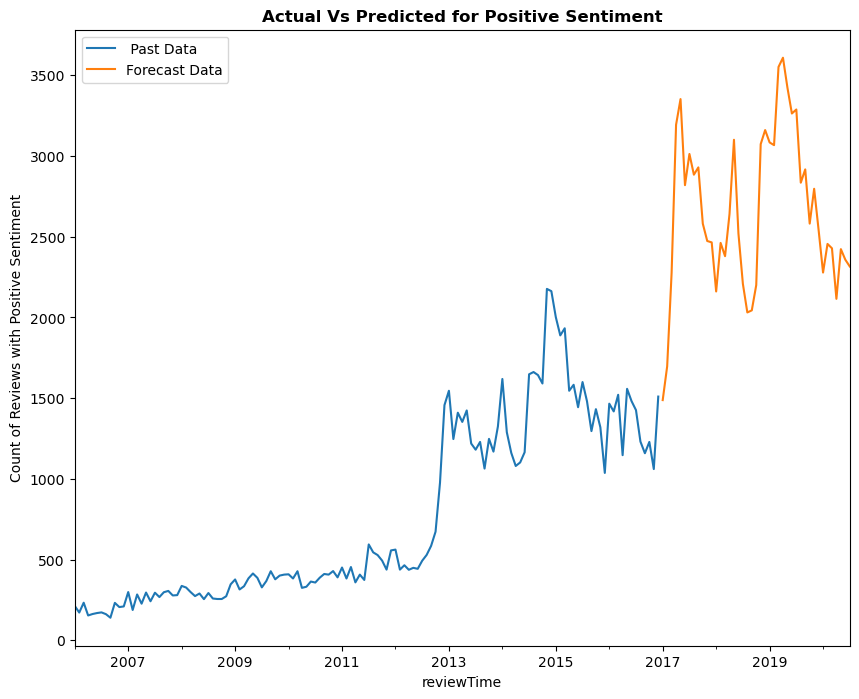

In [446]:
train_pos.plot(figsize=(10,8),legend=True,sharex=True,label=' Past Data')
# test_pos.plot(figsize=(10,8),legend=True,sharex=True)
fortp.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Positive Sentiment')
plt.title('Actual Vs Predicted for Positive Sentiment',fontweight='bold')
plt.show()

In [447]:
train_neg=negative1[(negative1.index.year >= 2008) & (negative1.index.year <= 2016)]
test_neg=negative1[(negative1.index.year > 2016)]

In [448]:
sarima11 = SARIMAX(train_neg,order=(1,1,1),seasonal_order=(1,1,1,52)).fit()
sarima11_train_pred = sarima11.predict(0,(len(train_neg)-1))
sarima11_test_pred = sarima11.predict(len(train_neg),(len(train_neg)+len(test_neg)-1))
print(sarima11.summary())
ljung11 = sm.stats.acorr_ljungbox(sarima.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung11}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -256.826
Date:                            Mon, 03 Apr 2023   AIC                            523.652
Time:                                    14:32:48   BIC                            533.689
Sample:                                01-31-2008   HQIC                           527.534
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2120      0.432     -0.491      0.623      -1.058       0.634
ma.L1         -0.1547      0.360   

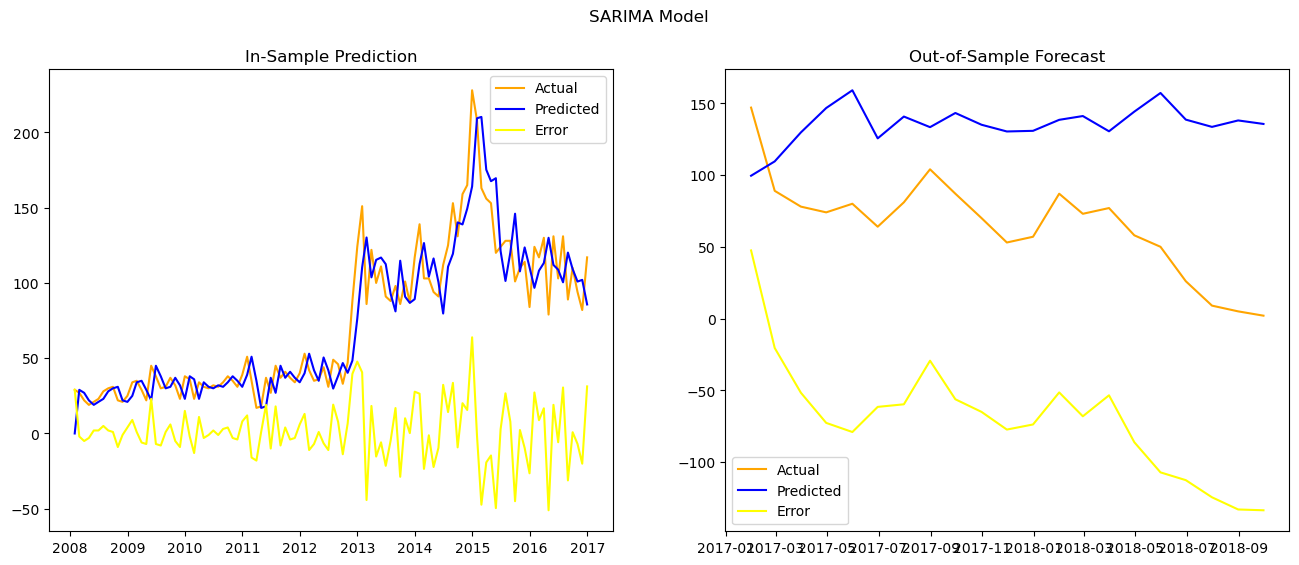

In [449]:
saim11_train = pd.DataFrame({'Actual':train_neg,'Predicted':sarima11_train_pred})
saim11_test = pd.DataFrame({'Actual':test_neg,'Predicted':sarima11_test_pred})
saim11_train['Error']=saim11_train['Actual']-saim11_train['Predicted']
saim11_test['Error']=saim11_test['Actual']-saim11_test['Predicted']

plt.subplots(1,2,figsize=(16,6))
plt.subplot(1,2,1)

plt.plot(saim11_train['Actual'],color='orange',label='Actual')
plt.plot(saim11_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim11_test['Actual'],color='orange',label='Actual')
plt.plot(saim11_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim11_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [450]:
np.sqrt(mean_squared_error(saim11_test.Actual,saim11_test.Predicted))

80.70707727082097

In [451]:
np.sqrt(mean_squared_error(saim11_train.Actual,saim11_train.Predicted))

19.55754130910402

In [452]:
fortng=sarima11.forecast(len(test_neg)+20)

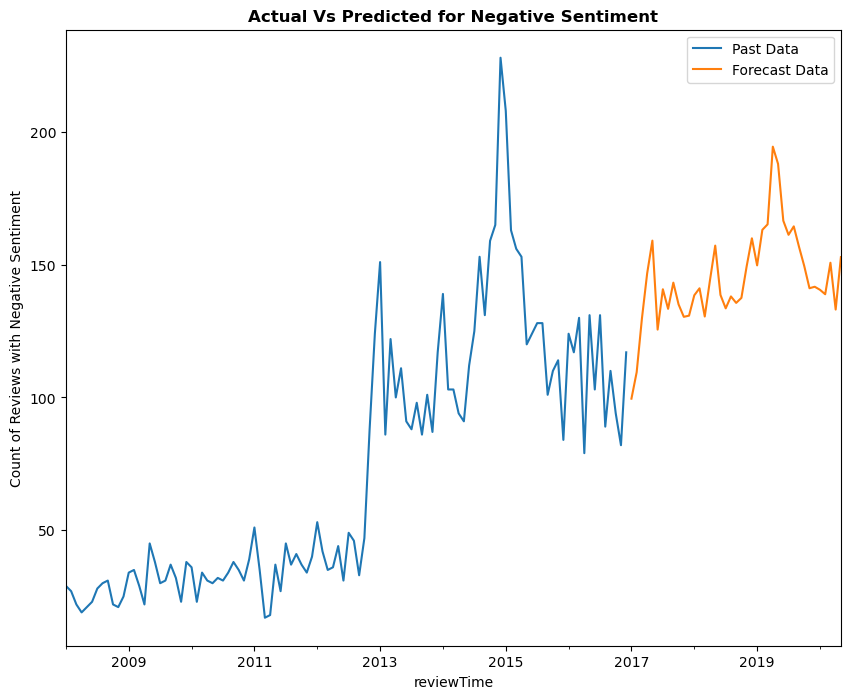

In [453]:
train_neg.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neg.plot(figsize=(10,8),legend=True,sharex=True)
fortng.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Negative Sentiment')
plt.title('Actual Vs Predicted for Negative Sentiment',fontweight='bold')
plt.show()

In [454]:
train_neu=neutral1[(neutral1.index.year >= 2008) & (neutral1.index.year <= 2016)]
test_neu=neutral1[(neutral1.index.year > 2016)]

In [455]:
sarima12 = SARIMAX(train_neu,order=(1,1,1),seasonal_order=(1,1,1,52)).fit()
sarima12_train_pred = sarima12.predict(0,(len(train_neu)-1))
sarima12_test_pred = sarima12.predict(len(train_neu),(len(train_neu)+len(test_neu)-1))
print(sarima11.summary())
ljung12 = sm.stats.acorr_ljungbox(sarima12.resid,lags=[1],return_df=True)['lb_pvalue'].values
print(f'LJung Box Test Value : {ljung12}')

                                     SARIMAX Results                                      
Dep. Variable:                         reviewerID   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 52)   Log Likelihood                -256.826
Date:                            Mon, 03 Apr 2023   AIC                            523.652
Time:                                    14:32:56   BIC                            533.689
Sample:                                01-31-2008   HQIC                           527.534
                                     - 12-31-2016                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2120      0.432     -0.491      0.623      -1.058       0.634
ma.L1         -0.1547      0.360   

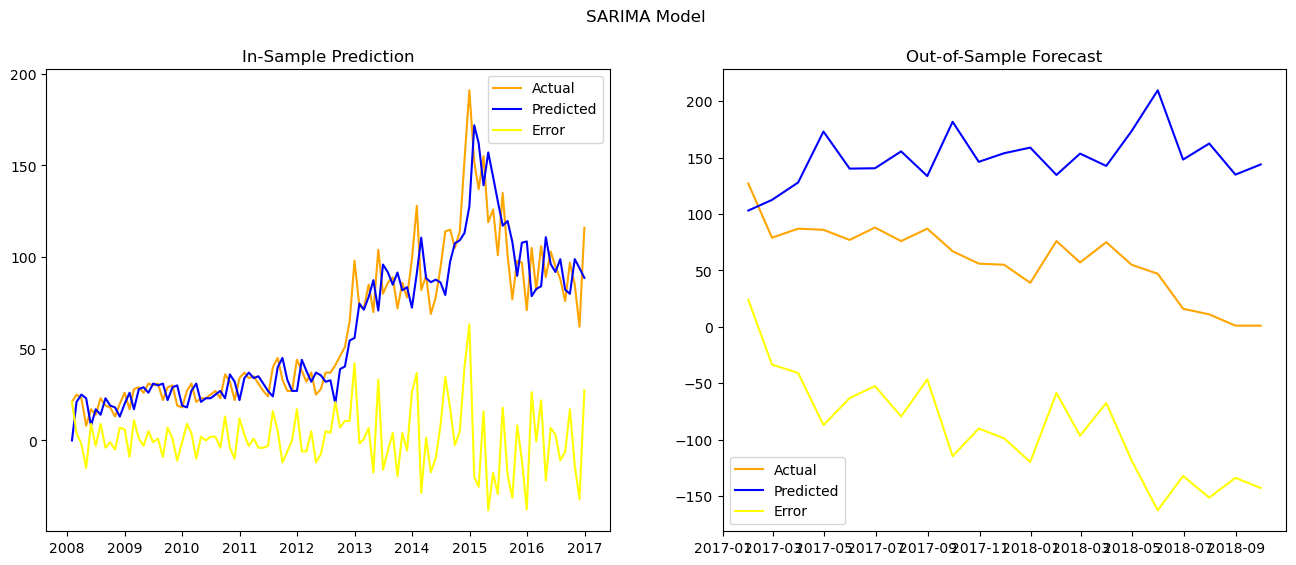

In [456]:
saim12_train = pd.DataFrame({'Actual':train_neu,'Predicted':sarima12_train_pred})
saim12_test = pd.DataFrame({'Actual':test_neu,'Predicted':sarima12_test_pred})
saim12_train['Error']=saim12_train['Actual']-saim12_train['Predicted']
saim12_test['Error']=saim12_test['Actual']-saim12_test['Predicted']
plt.subplots(1,2,figsize=(16,6)) 

plt.subplot(1,2,1)
plt.plot(saim12_train['Actual'],color='orange',label='Actual')
plt.plot(saim12_train['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_train['Error'],color='yellow',label='Error')
plt.title('In-Sample Prediction')
plt.legend()
plt.subplot(1,2,2)

plt.plot(saim12_test['Actual'],color='orange',label='Actual')
plt.plot(saim12_test['Predicted'],color='blue',label='Predicted')
plt.plot(saim12_test['Error'],color='yellow',label='Error')
plt.title('Out-of-Sample Forecast')
plt.legend()
plt.suptitle('SARIMA Model');

In [457]:
np.sqrt(mean_squared_error(saim12_test.Actual,saim12_test.Predicted))

99.61322132718696

In [458]:
np.sqrt(mean_squared_error(saim12_train.Actual,saim12_train.Predicted))

16.58211951973919

In [459]:
fortne=sarima12.forecast(len(test_neu)+21)

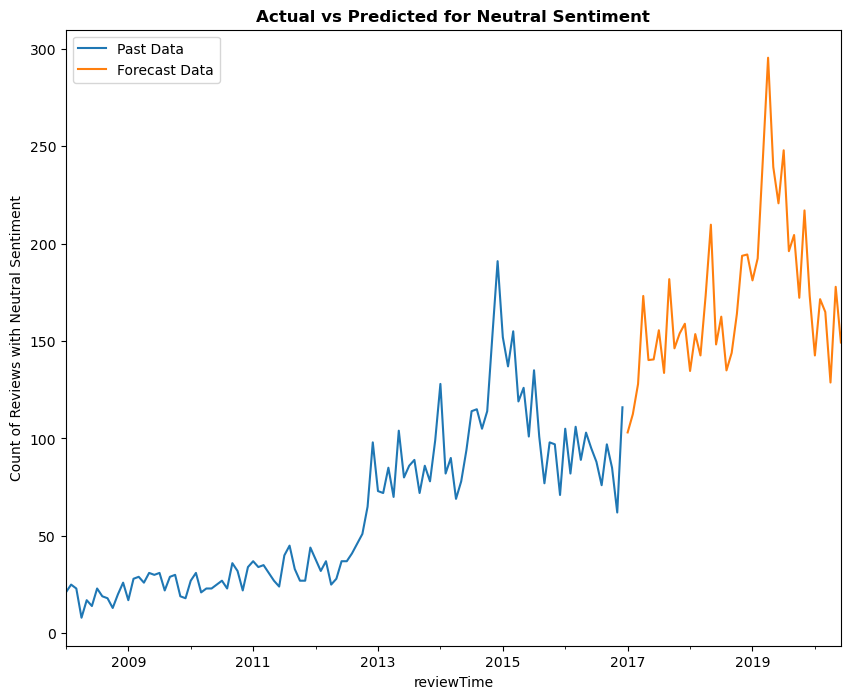

In [460]:
train_neu.plot(figsize=(10,8),legend=True,sharex=True,label='Past Data')
# test_neu.plot(figsize=(10,8),legend=True,sharex=True)
fortne.plot(legend=True,label='Forecast Data')
plt.ylabel('Count of Reviews with Neutral Sentiment')
plt.title('Actual vs Predicted for Neutral Sentiment',fontweight='bold')
plt.show()

In [ ]:
Digital_MusicFinal1